In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = '/content/drive/MyDrive/Colab Notebooks/consumer.csv'
data = pd.read_csv(df, sep=',')
data

,CSI코드별,CSI분류코드별,2023.07,2023.08,2023.09,2023.1,2023.11,2023.12
0,현재생활형편CSI,전체,91,91,89,88,87,88
1,현재생활형편CSI,남자,92,91,90,88,87,89
2,현재생활형편CSI,여자,90,89,88,86,86,85
3,현재생활형편CSI,40세미만,96,97,95,93,92,92
4,현재생활형편CSI,40-50세,87,86,85,84,82,84
...,...,...,...,...,...,...,...,...
524,임금수준전망CSI,임차 등,114,115,114,113,112,113
525,임금수준전망CSI,서울,116,118,115,117,114,114
526,임금수준전망CSI,6대광역시,119,118,116,117,116,117
527,임금수준전망CSI,기타도시,117,118,117,115,115,116


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CSI코드별    529 non-null    object
 1   CSI분류코드별  529 non-null    object
 2   2023.07   529 non-null    int64 
 3   2023.08   529 non-null    int64 
 4   2023.09   529 non-null    int64 
 5   2023.1    529 non-null    int64 
 6   2023.11   529 non-null    int64 
 7   2023.12   529 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 33.2+ KB


In [ ]:
columns = list(data.columns)

In [ ]:
def getCatCol(data):
  cat_columns = []
  for col in data.columns:
    if data[col].dtype == 'object':
      cat_columns.append(col)
  return cat_columns

In [ ]:
cat_columns = getCatCol(data)

In [ ]:
num_columns = [x for x in columns if x not in cat_columns]

In [ ]:
print(columns)
print(cat_columns)
print(num_columns)

['CSI코드별', 'CSI분류코드별', '2023.07', '2023.08', '2023.09', '2023.1', '2023.11', '2023.12']
['CSI코드별', 'CSI분류코드별']
['2023.07', '2023.08', '2023.09', '2023.1', '2023.11', '2023.12']


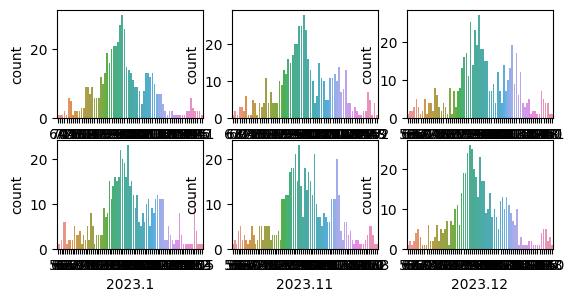

In [ ]:
plt.subplot(3, 3, 1)
sns.countplot(data = data, x = "2023.07")

plt.subplot(3, 3, 2)
sns.countplot(data = data, x = "2023.08")

plt.subplot(3, 3, 3)
sns.countplot(data = data, x = "2023.09")

plt.subplot(3, 3, 4)
sns.countplot(data = data, x = "2023.1")

plt.subplot(3, 3, 5)
sns.countplot(data = data, x = "2023.11")

plt.subplot(3, 3, 6)
sns.countplot(data = data, x = "2023.12")
plt.show()

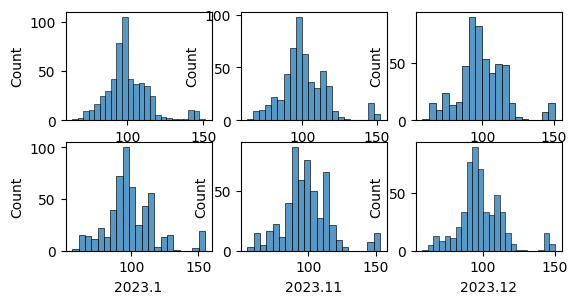

In [ ]:
plt.subplot(3, 3, 1)
sns.histplot(data = data, x = "2023.07")

plt.subplot(3, 3, 2)
sns.histplot(data = data, x = "2023.08")

plt.subplot(3, 3, 3)
sns.histplot(data = data, x = "2023.09")

plt.subplot(3, 3, 4)
sns.histplot(data = data, x = "2023.1")

plt.subplot(3, 3, 5)
sns.histplot(data = data, x = "2023.11")

plt.subplot(3, 3, 6)
sns.histplot(data = data, x = "2023.12")
plt.show()

In [ ]:
print(data["2023.07"].value_counts())
print(data["2023.08"].value_counts())
print(data["2023.09"].value_counts())
print(data["2023.1"].value_counts())
print(data["2023.11"].value_counts())
print(data["2023.12"].value_counts())

99     30
98     27
100    26
97     22
96     21
       ..
139     1
151     1
73      1
64      1
120     1
Name: 2023.07, Length: 68, dtype: int64
99     28
97     25
98     25
100    24
95     20
       ..
63      1
69      1
75      1
78      1
126     1
Name: 2023.08, Length: 66, dtype: int64
97     27
93     25
95     23
113    19
96     19
       ..
71      1
68      1
150     1
129     1
126     1
Name: 2023.09, Length: 70, dtype: int64
98     23
94     22
95     20
96     19
97     16
       ..
73      1
80      1
132     1
131     1
125     1
Name: 2023.1, Length: 79, dtype: int64
94     23
92     21
102    21
114    20
91     18
       ..
55      1
153     1
60      1
71      1
128     1
Name: 2023.11, Length: 77, dtype: int64
93     26
94     25
92     24
98     23
95     20
       ..
58      1
70      1
69      1
64      1
117     1
Name: 2023.12, Length: 71, dtype: int64


In [ ]:
data.describe()

,2023.07,2023.08,2023.09,2023.1,2023.11,2023.12
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,100.245747,100.752363,99.676749,99.531191,98.258979,98.189036
std,14.006631,15.172653,16.607987,18.120166,17.450879,15.487354
min,64.000000,63.000000,58.000000,56.000000,55.000000,58.000000
25%,92.000000,92.000000,91.000000,90.000000,89.000000,90.000000
50%,99.000000,99.000000,98.000000,97.000000,97.000000,96.000000
75%,107.000000,109.000000,110.000000,110.000000,108.000000,106.000000
max,151.000000,152.000000,151.000000,155.000000,153.000000,150.000000


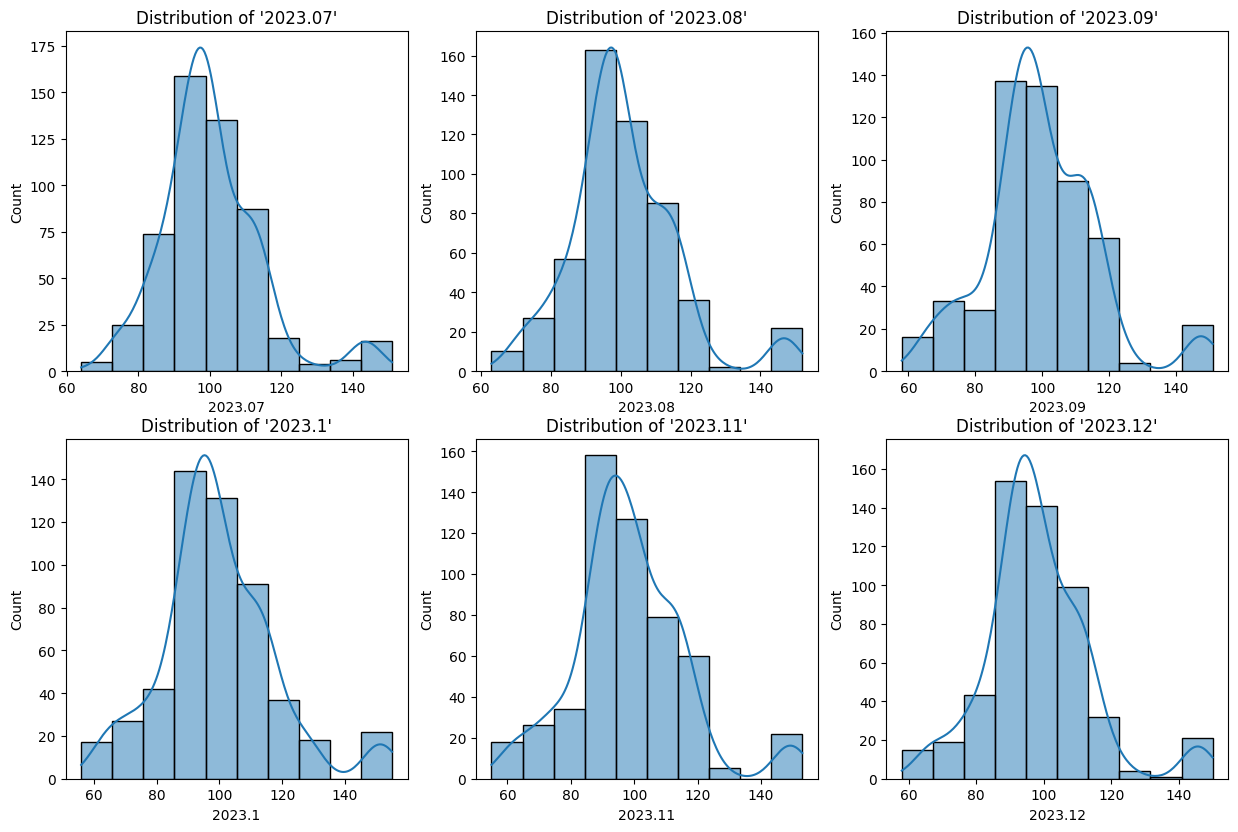

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  plt.subplot(3, 3, i+1)
  sns.histplot(data = data, x = num_columns[i],
      bins = 10,
      kde = True,
      ).set(title = f"Distribution of '{num_columns[i]}'");

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fu

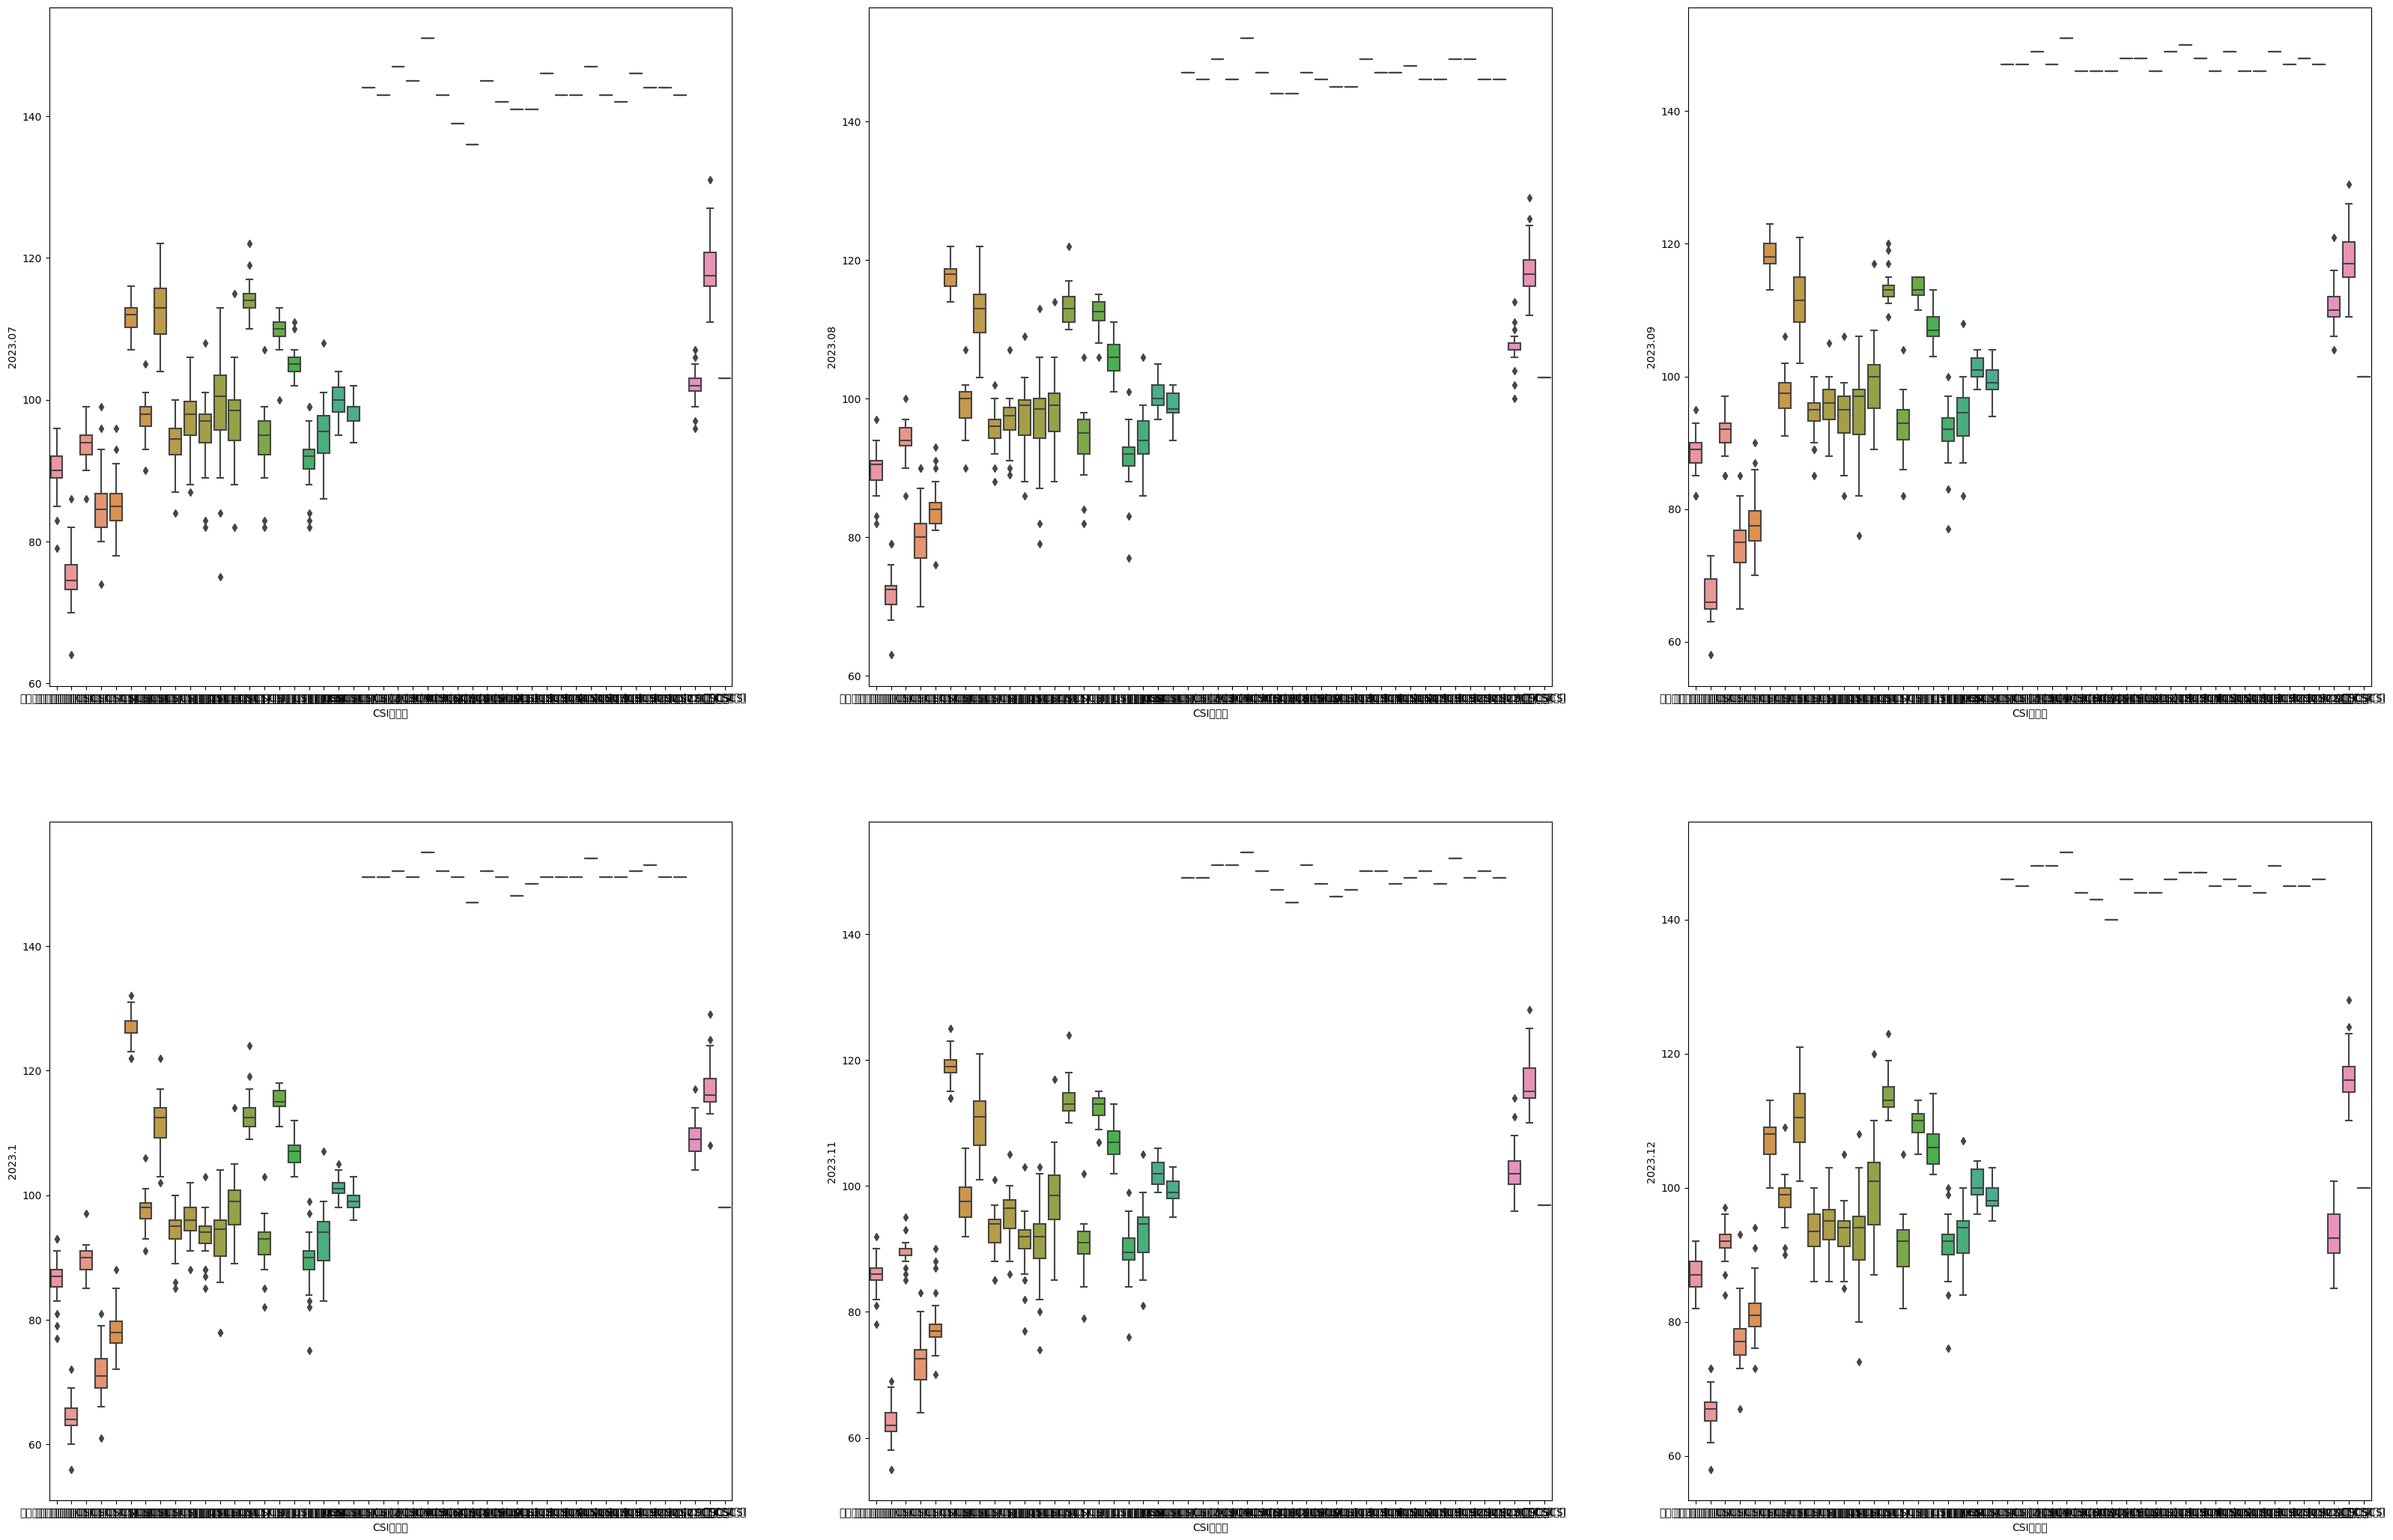

In [ ]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(3, 3, i+1)
  ax = sns.boxplot(data = data, x = "CSI코드별", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args,

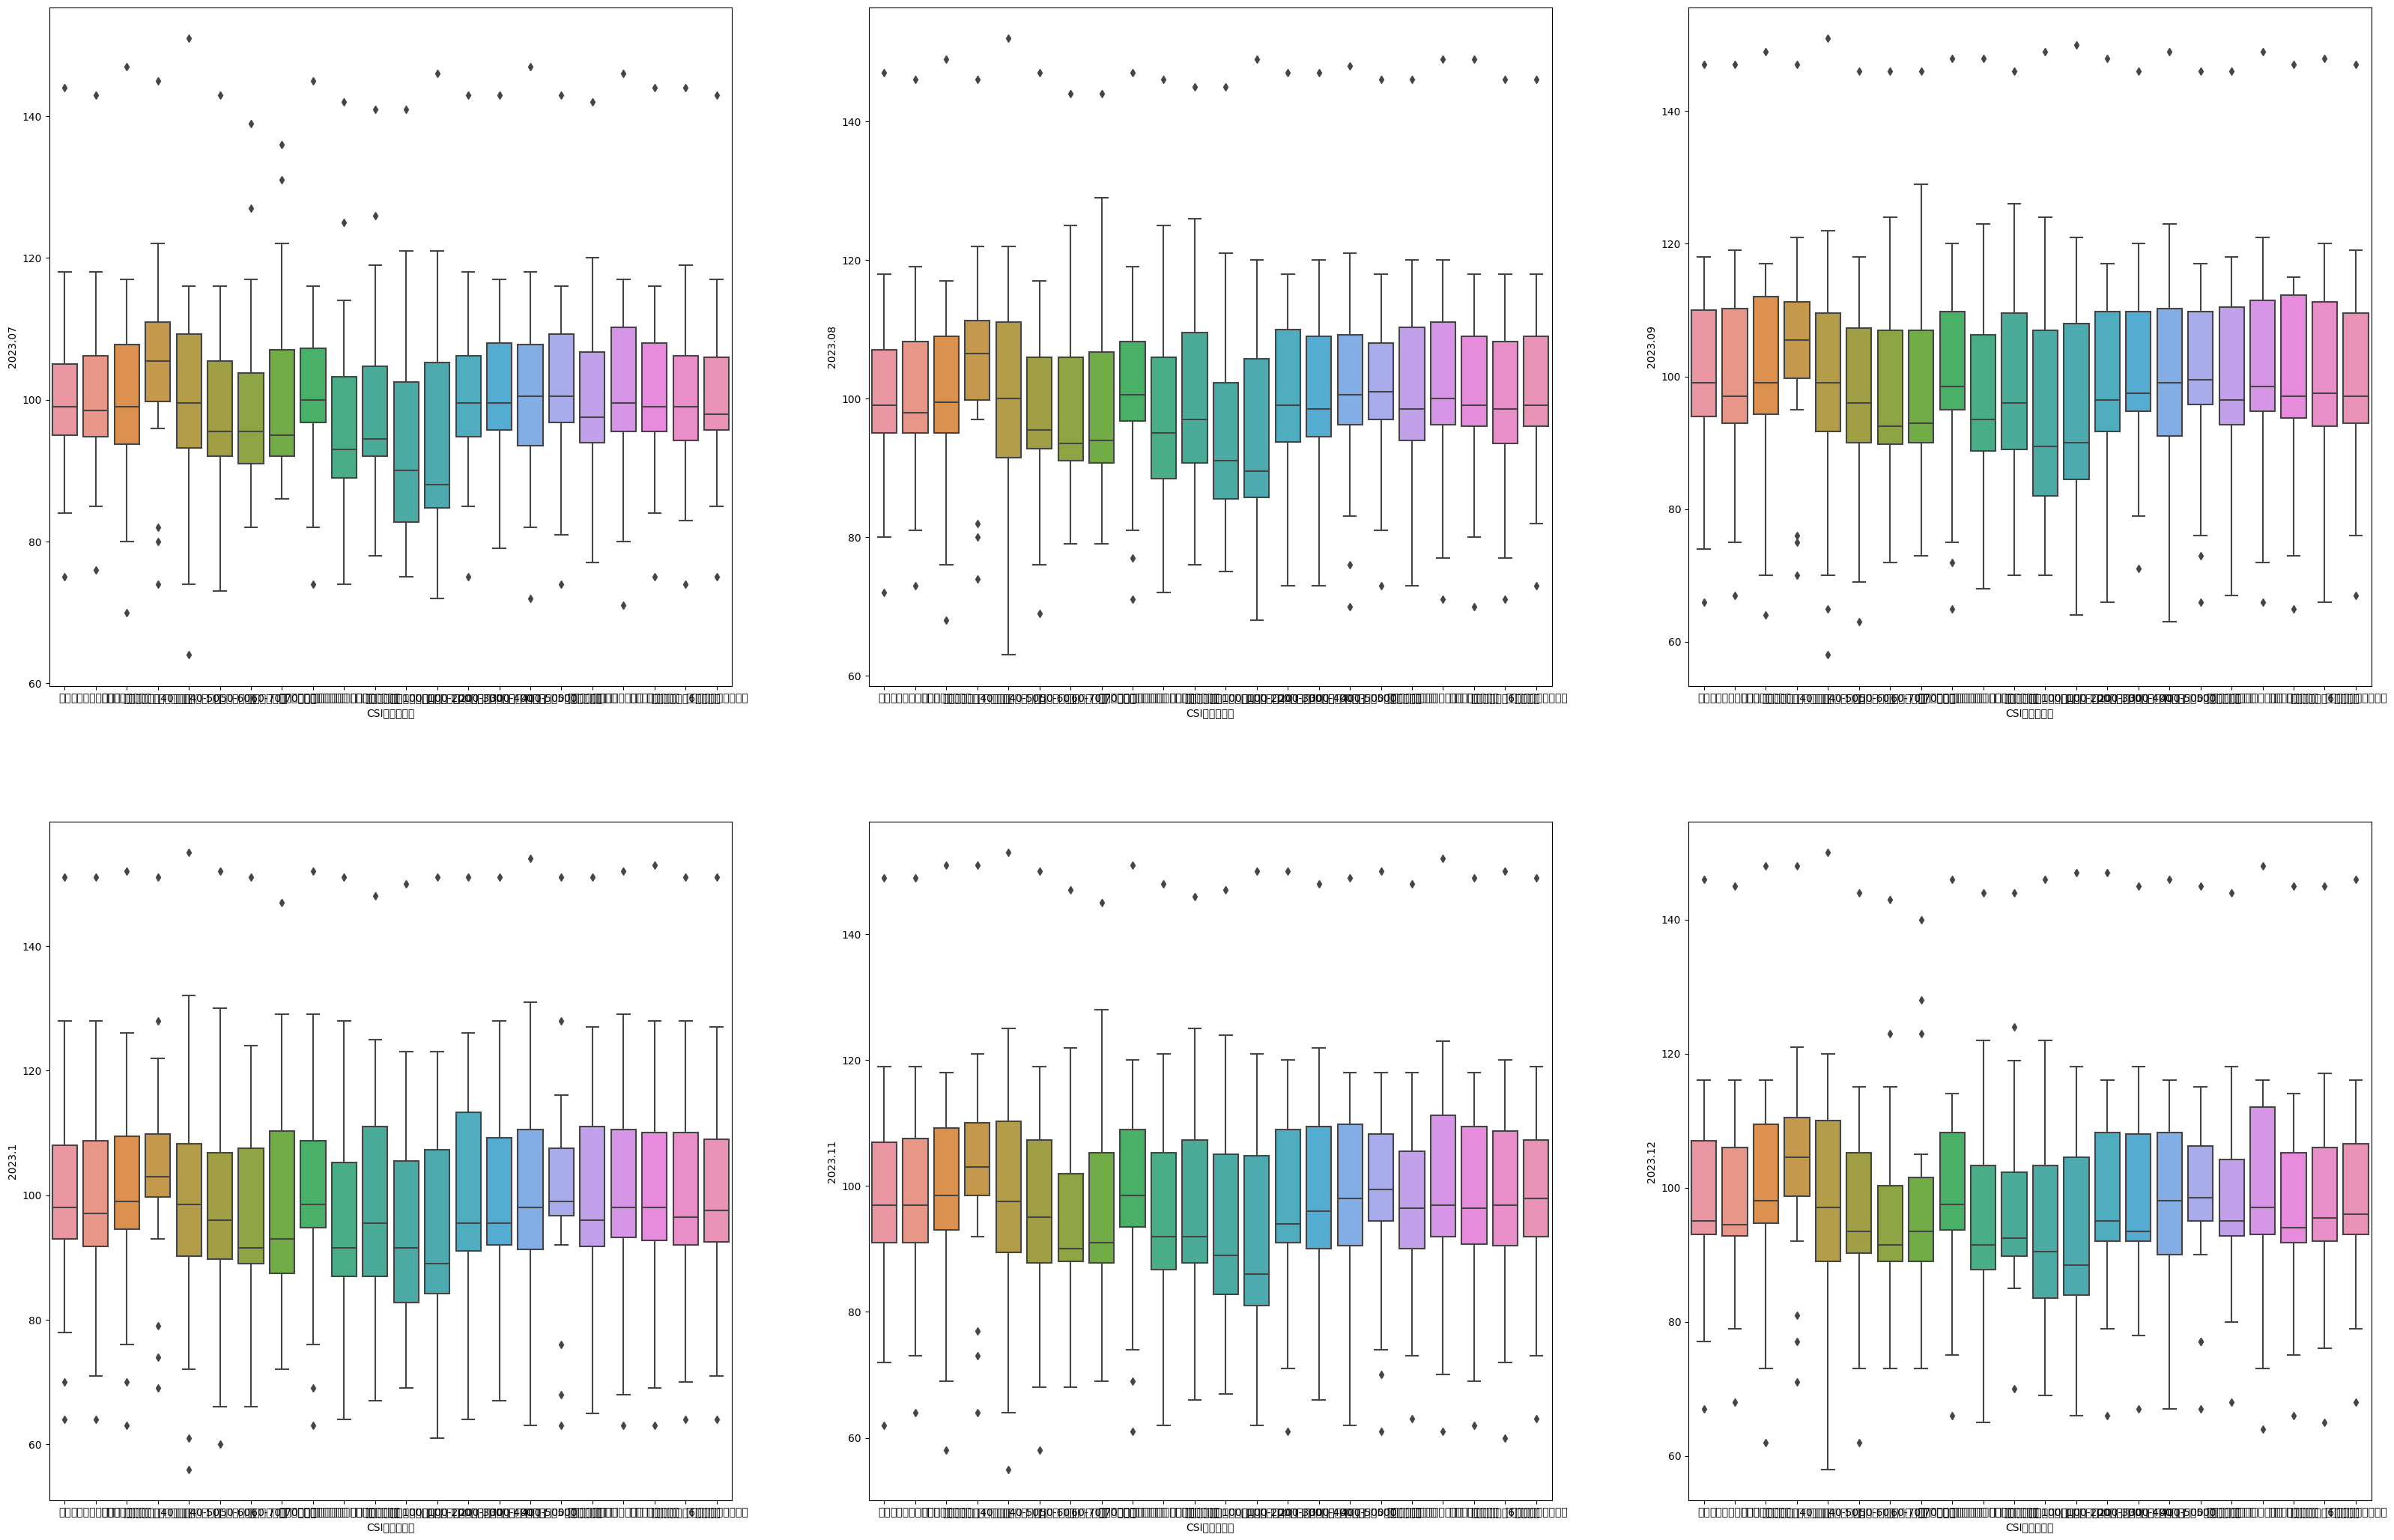

In [ ]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(3, 3, i+1)
  ax = sns.boxplot(data = data, x = "CSI분류코드별", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fu

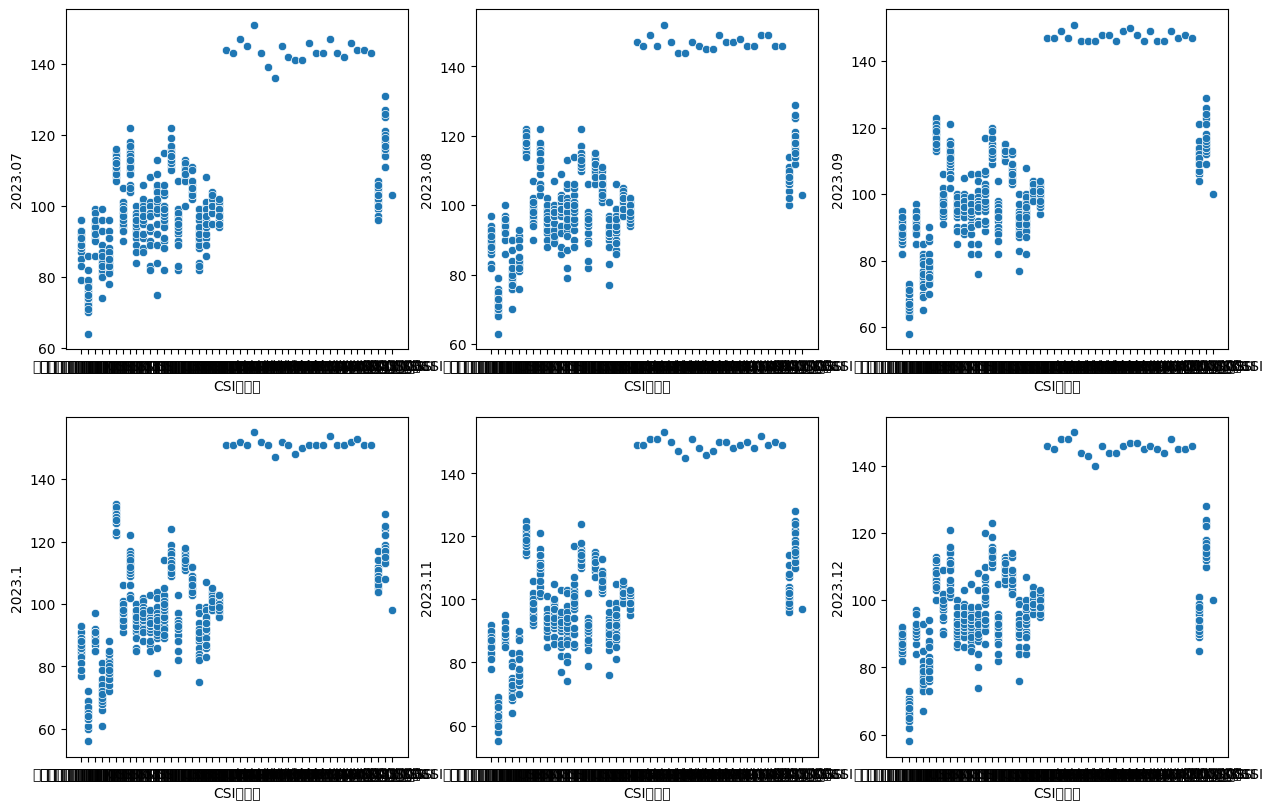

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  ax = plt.subplot(3, 3, i+1)
  ax = sns.scatterplot(data = data, x = "CSI코드별", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args,

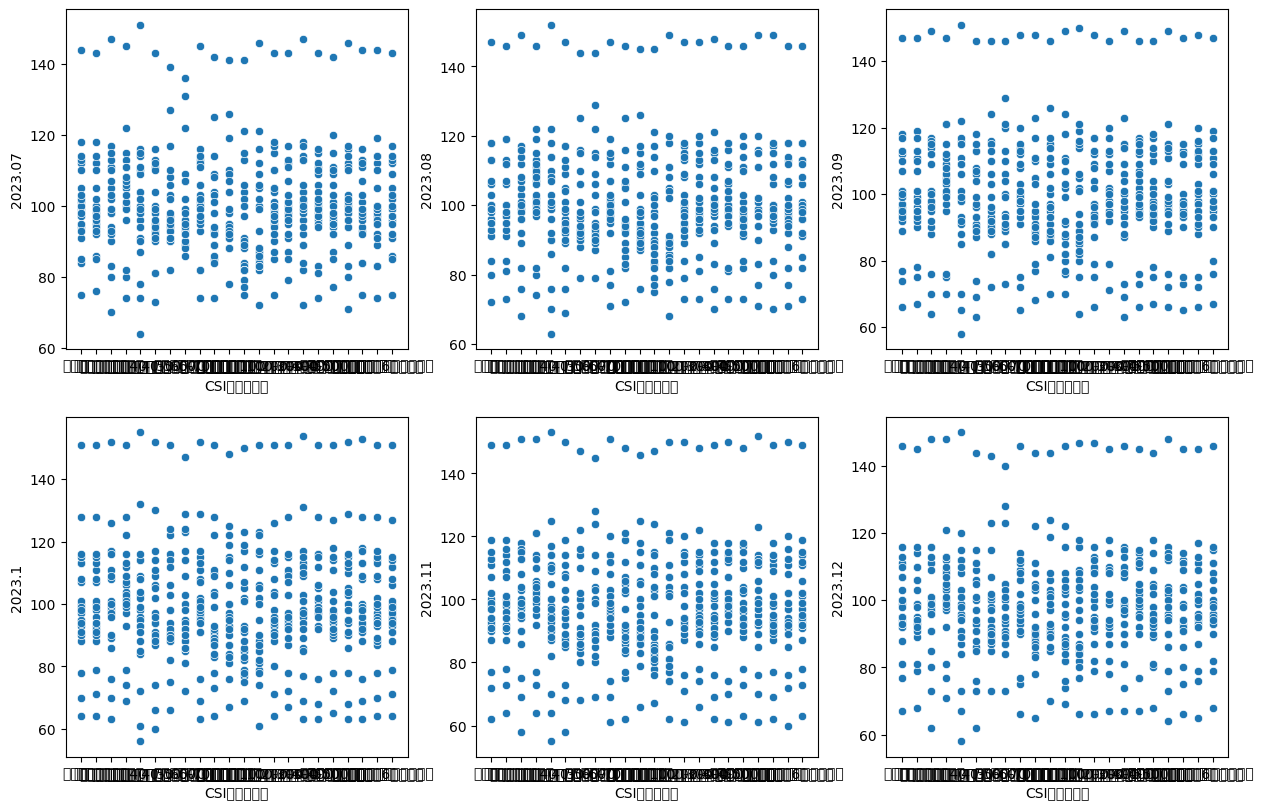

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  ax = plt.subplot(3, 3, i+1)
  ax = sns.scatterplot(data = data, x = "CSI분류코드별", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect co

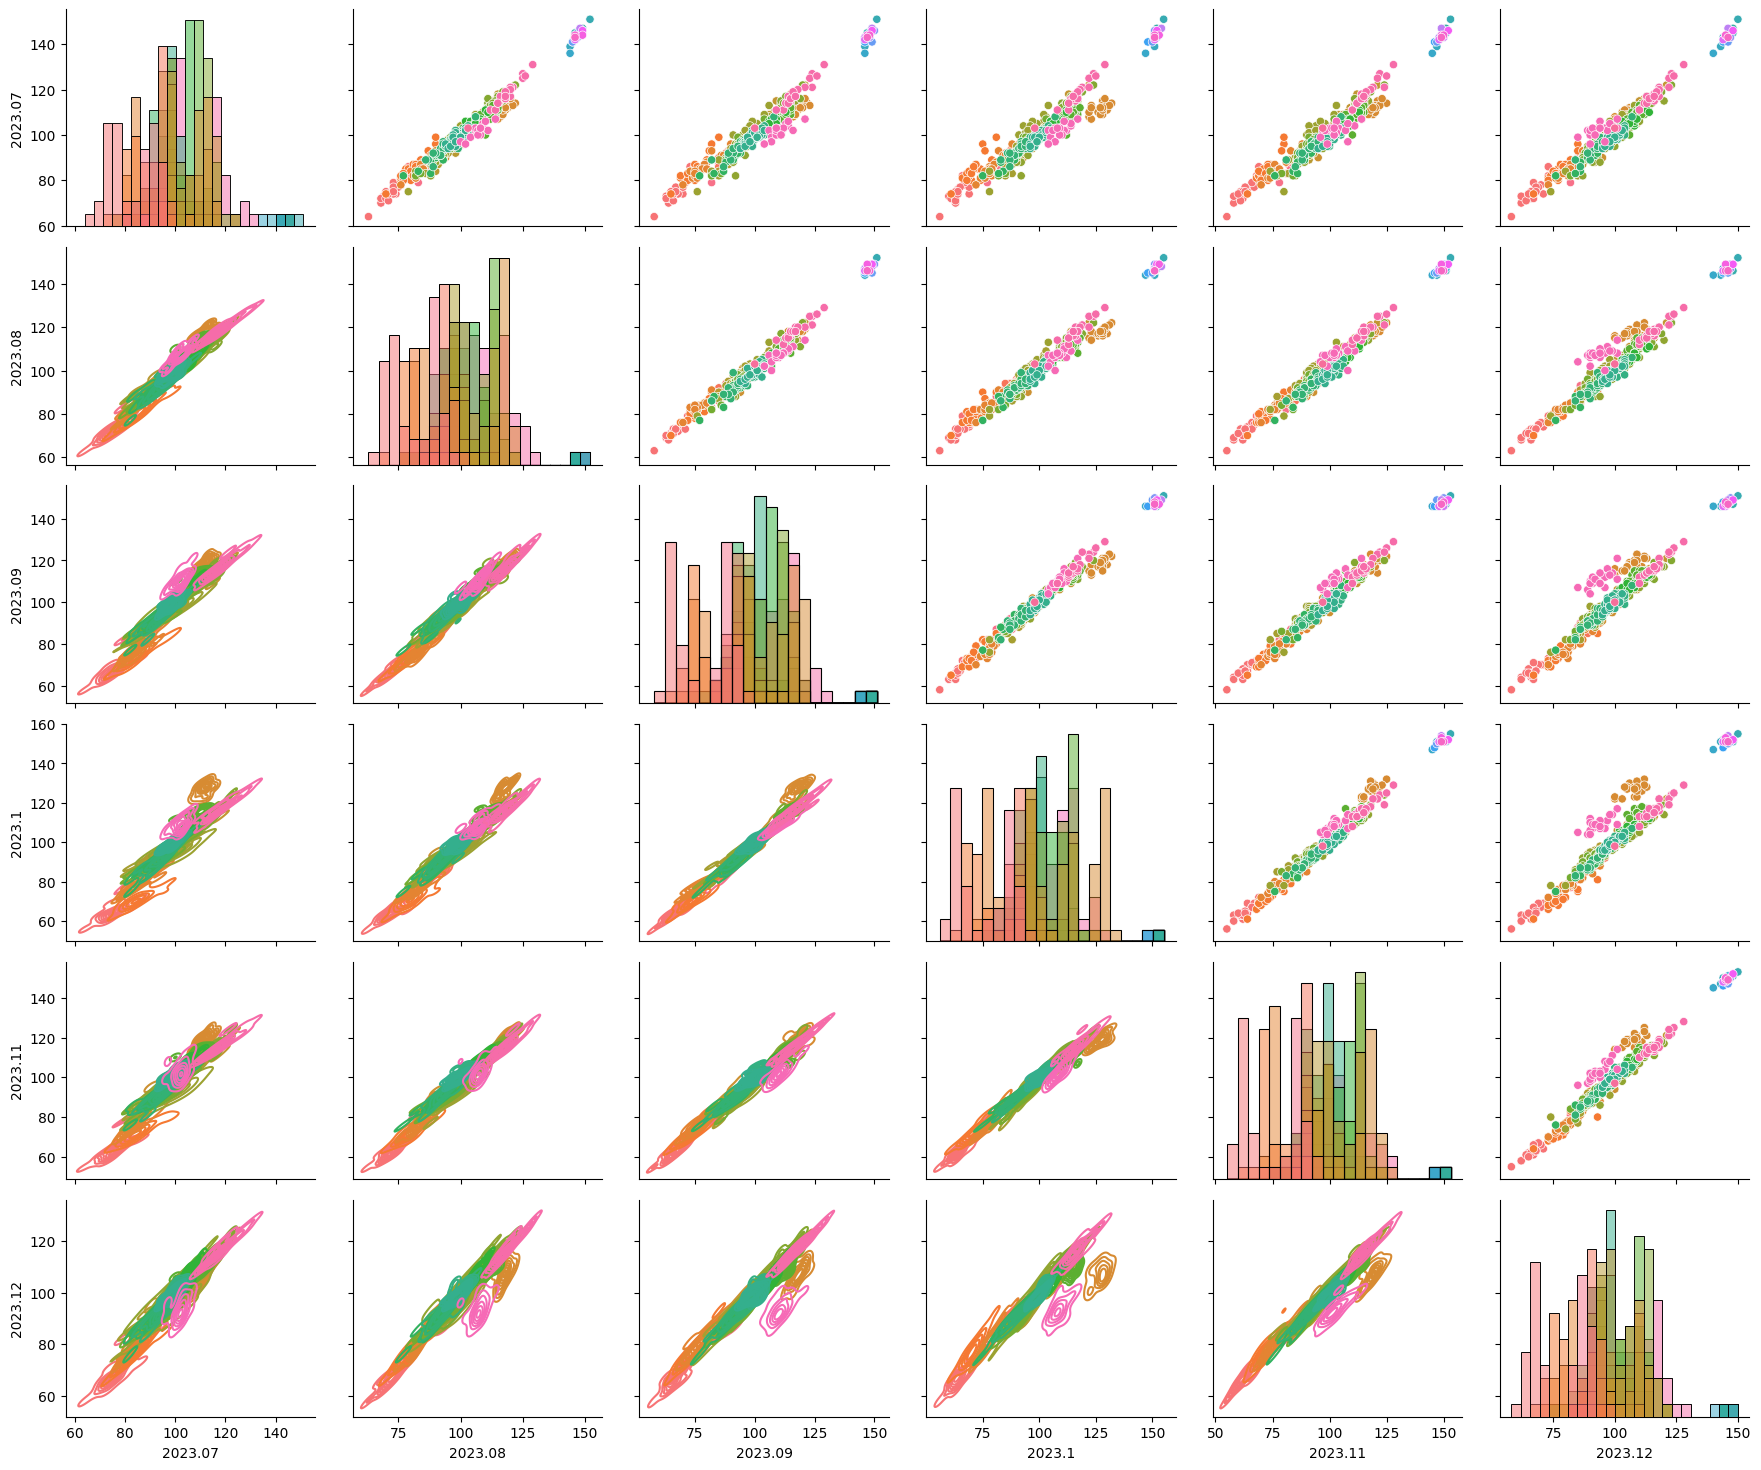

In [ ]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "CSI코드별")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

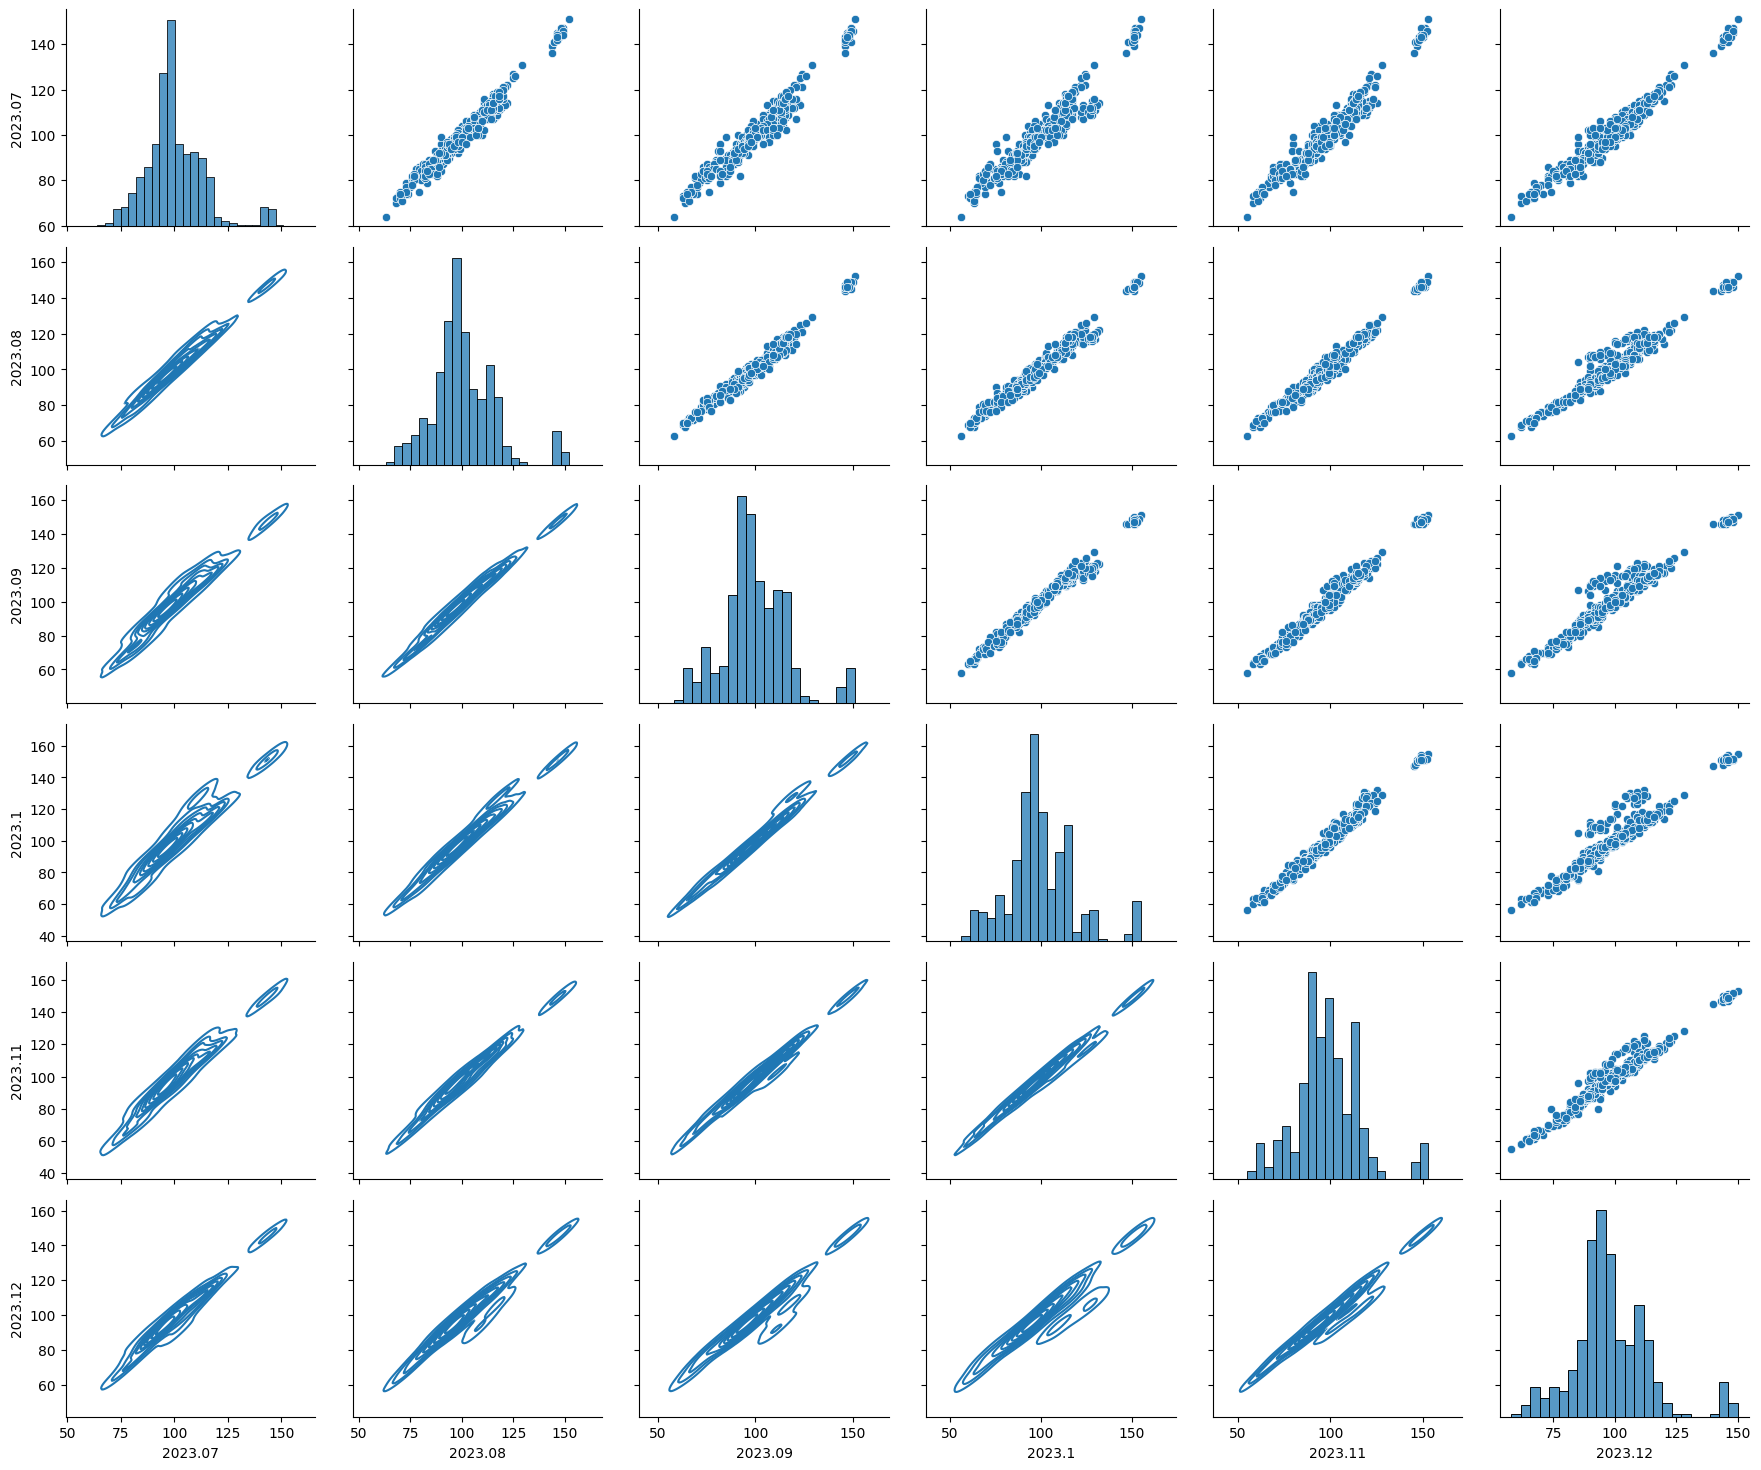

In [ ]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2)
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

In [ ]:
corr_mat = np.round(data[num_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

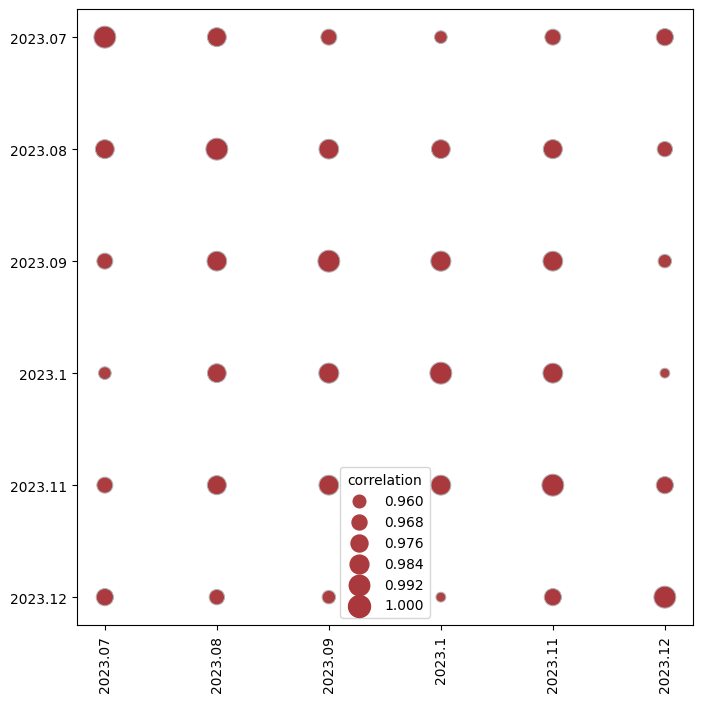

In [ ]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

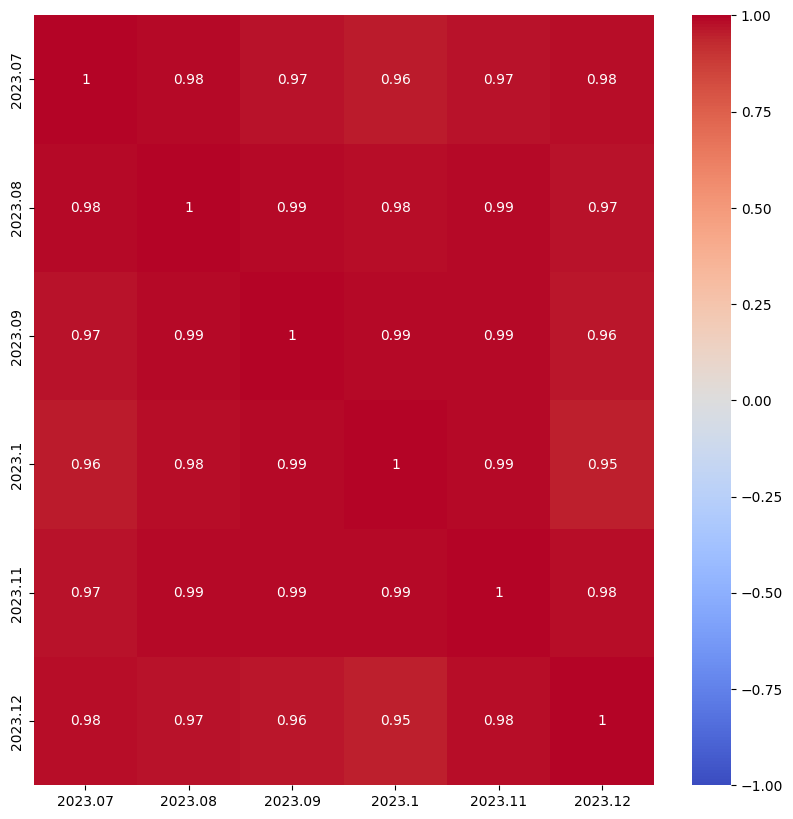

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

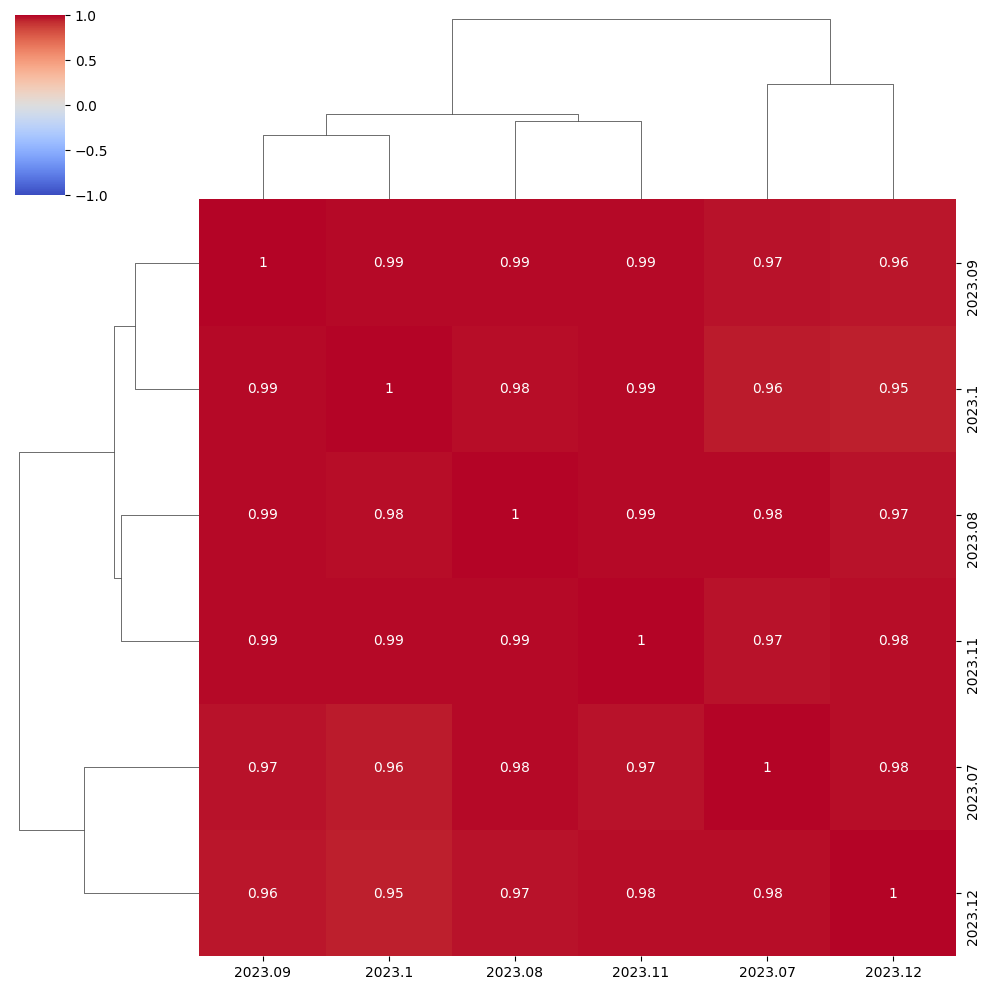

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")

In [ ]:
data.describe(include="object")

,CSI코드별,CSI분류코드별
count,529,529
unique,46,22
top,현재생활형편CSI,전체
freq,22,25


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig

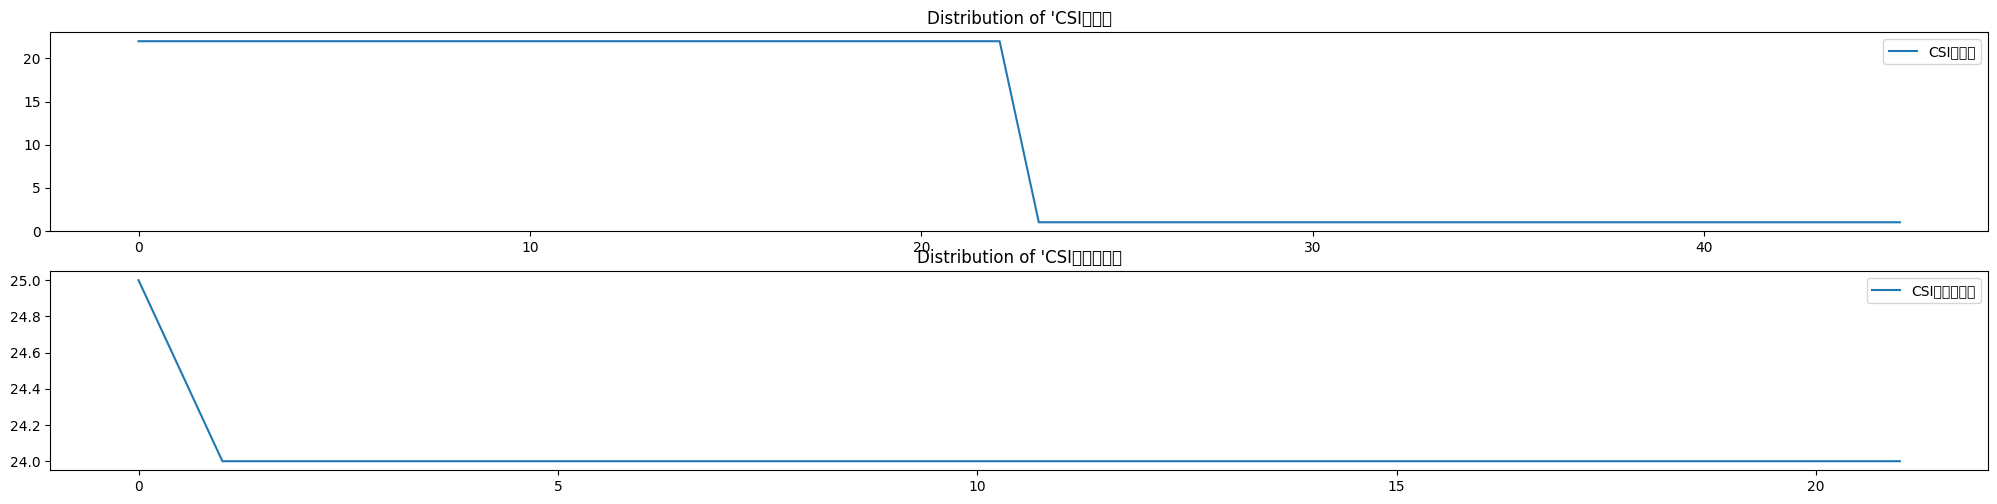

In [ ]:
plt.figure(figsize = (25, 15))
for i in range(len(cat_columns)):
  plt.subplot(5, 1, i+1)
  sns.lineplot(data = pd.DataFrame(data[f"{cat_columns[i]}"].value_counts()).reset_index()).set(title = f"Distribution of '{cat_columns[i]}");

<ipython-input-50-5c9c30f274df>:10: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  plt.tight_layout()
<ipython-input-50-5c9c30f274df>:10: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  plt.tight_layout()
<ipython-input-50-5c9c30f274df>:10: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-50-5c9c30f274df>:10: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  plt.tight_layout()
<ipython-input-50-5c9c30f274df>:10: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-50-5c9c30f274df>:10: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
<ipython-input-50-5c9c30f274df>:10: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
<ipython-input-50-5c9c30f274df>:10: UserWarning: Glyph 

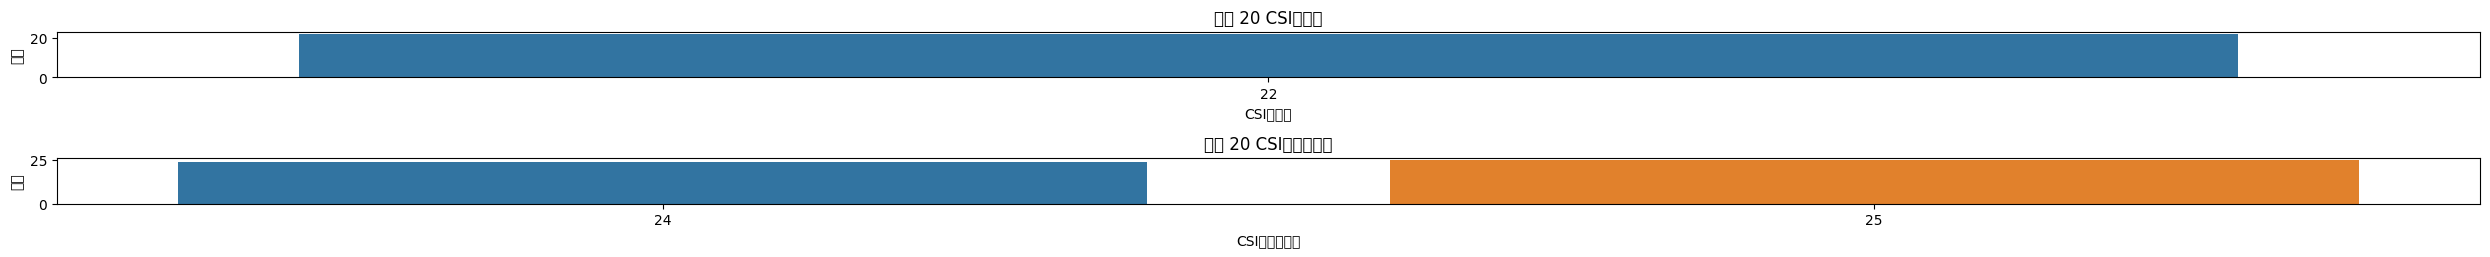

In [ ]:
plt.figure(figsize=(25, 25))

for i in range(len(cat_columns)):
    plt.subplot(20, 1, i + 1)
    value_counts_df = data[f"{cat_columns[i]}"].value_counts().reset_index().head(20)
    sns.barplot(data=value_counts_df, x=f"{cat_columns[i]}", y=value_counts_df[value_counts_df.columns[1]].astype(int))
    plt.ylabel("개수")  # y축에 레이블 추가
    plt.title(f"상위 20 {cat_columns[i]}")  # 각 subplot에 제목 추가

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(25, 30))
tmp = pd.DataFrame()

for i in cat_columns:
    value_counts_df = data[f"{i}"].value_counts().reset_index().head(20)
    tmp[f"{i}"] = value_counts_df["index"]  # 'count' 대신 'index'를 사용합니다.
    tmp[f"{i}_count"] = value_counts_df[f"{i}"]
tmp

,CSI코드별,CSI코드별_count,CSI분류코드별,CSI분류코드별_count
0,현재생활형편CSI,22,전체,25
1,교육비 지출전망CSI,22,남자,24
2,현재경기판단CSI,22,6대광역시,24
3,주택가격전망CSI,22,서울,24
4,임금수준전망CSI,22,임차 등,24
5,가계부채전망CSI,22,자가,24
6,현재가계부채CSI,22,500만원이상,24
7,가계저축전망CSI,22,400-500만원,24
8,현재가계저축CSI,22,300-400만원,24
9,교통비 및 통신비 지출전망CSI,22,200-300만원,24


<Figure size 2500x3000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig

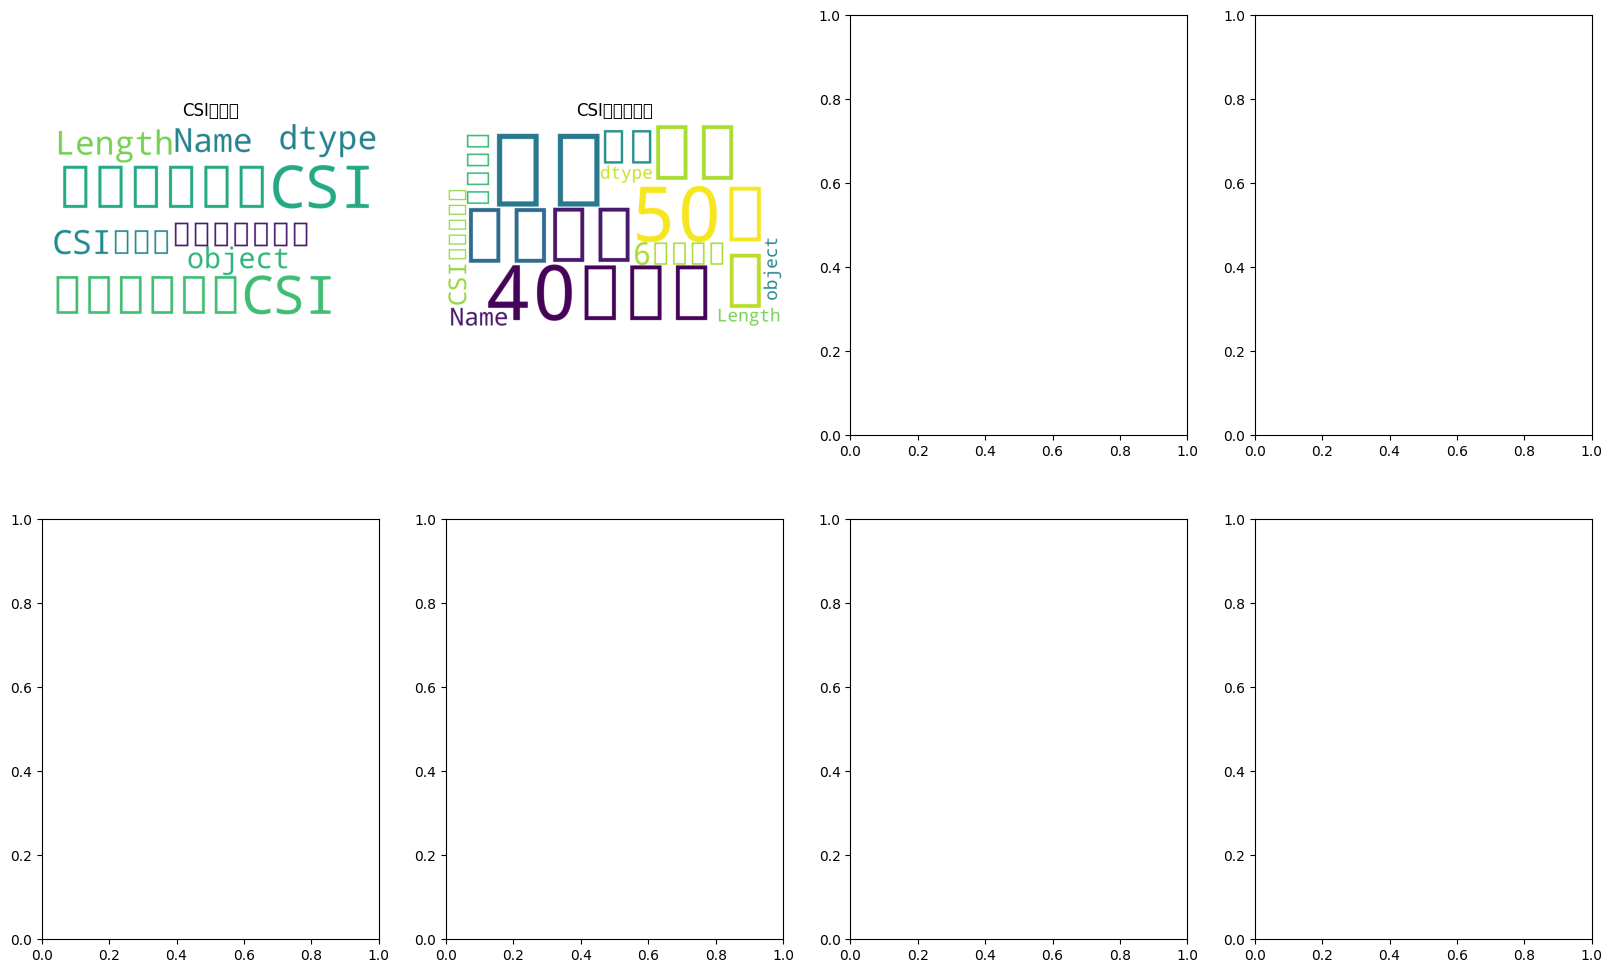

In [ ]:
wc = WordCloud(height=1200, width=2000, random_state=101, background_color='white')
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(cat_columns):
    op = wc.generate(str(data[c]))
    x = axes[i].imshow(op)
    x = axes[i].set_title(c.upper())
    x = axes[i].axis('off')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
    label = LabelEncoder()
    label = label.fit(data[col])
    data[col] = label.transform(data[col])

In [ ]:
corr_mat = np.round(data[columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig

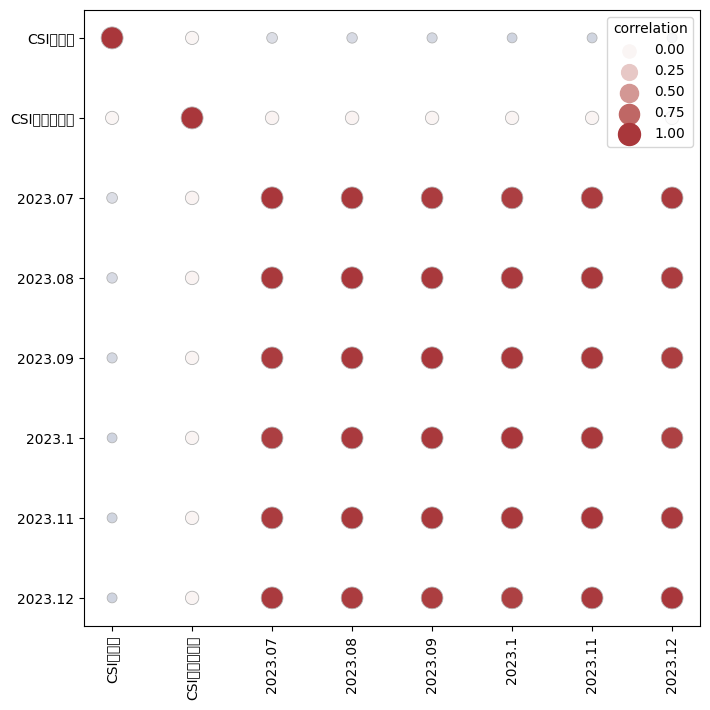

In [ ]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
    label.set_rotation(90)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.draw()


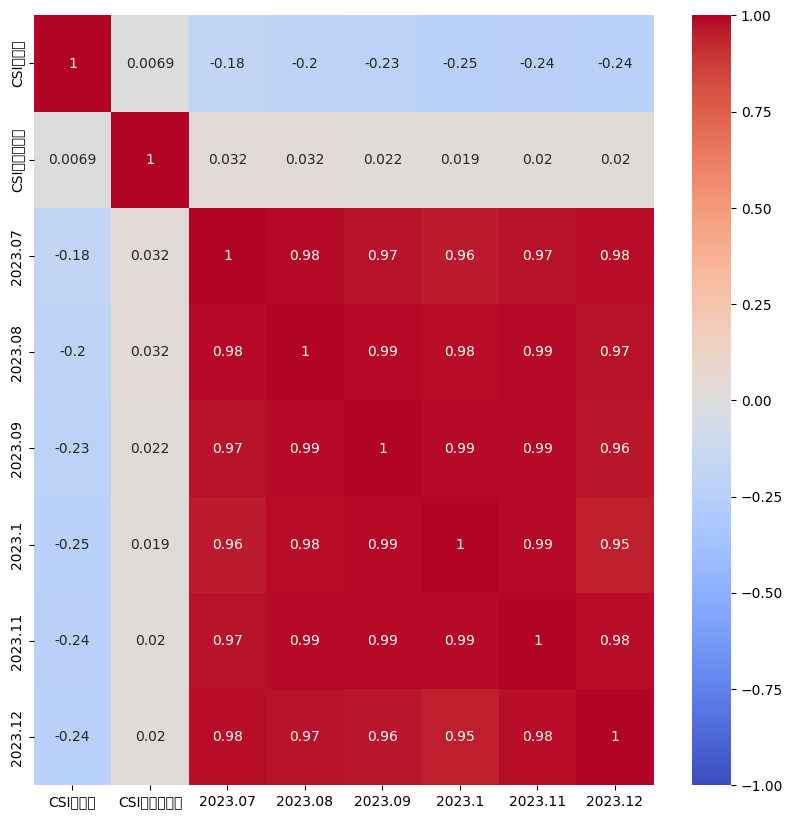

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

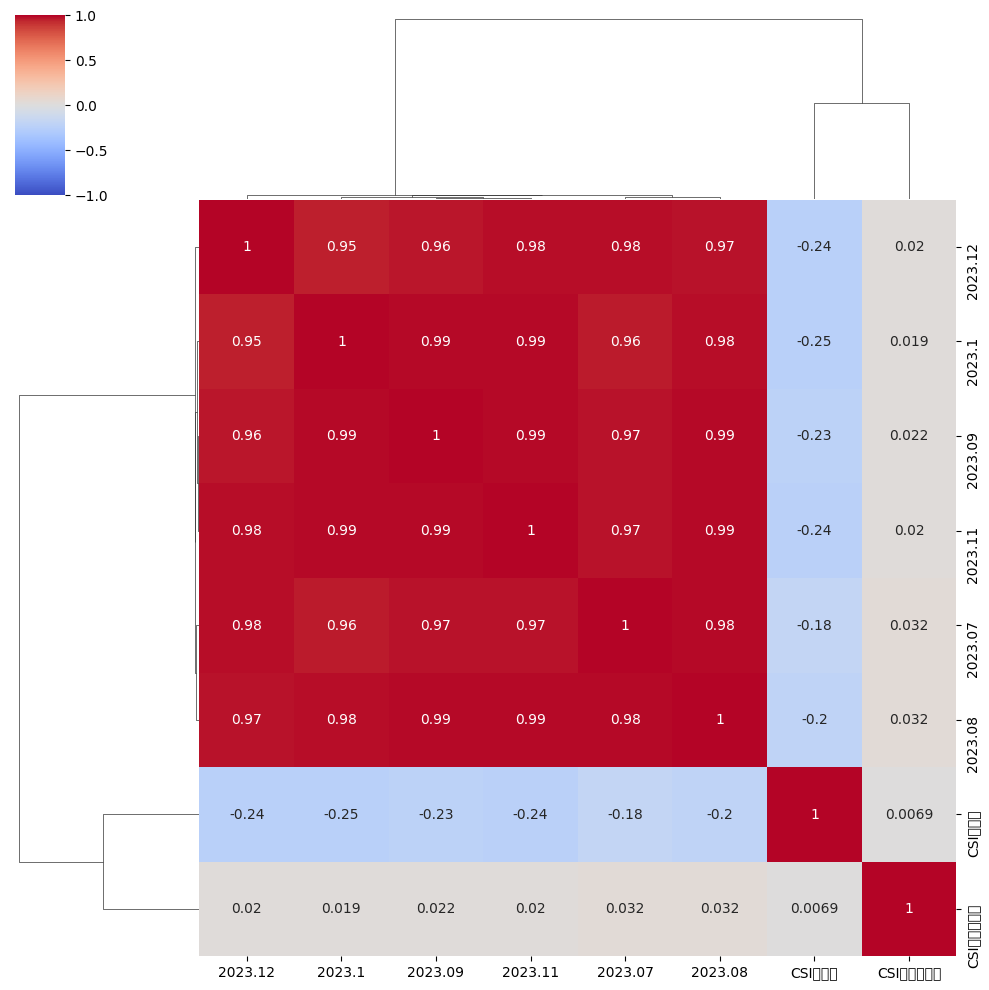

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin=-1, vmax=1, annot=True, cmap="coolwarm")